### 다중 회귀 선형 실습

In [4]:
!pip install matplotlib

### 다중 선형 회귀 식의 실습을 위해 필요한 라이브러리 불러오기.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## 공부 시간 x와 성적 y의 리스트 만들기.

In [42]:
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data] 
x2 = [i[1] for i in data] 
y = [i[2] for i in data] 

### 그래프로 직접 확인.

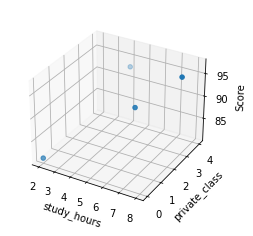

In [43]:
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours') 
ax.set_ylabel('private_class') 
ax.set_zlabel('Score') 
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()


## 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스로 하나씩 불러와 계산할 수 있도록 하기 위함)

In [53]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [54]:
# 기울기 a와 절편 b값의 초기화
a1 = 0
a2 = 0
b = 0

In [55]:
# 학습률
lr = 0.02

In [56]:
# 몇 번 반복할지 설정(0부터 세므로 원하는 반복 횟수에 +1)
epochs = 2001

In [57]:
# 경사 하강법 시작
for i in range(epochs): # epoch 반복
    y_pred = a1 * x1_data + a2 * x2_data+b # y를 구하는 식 세우기.
    error = y_data - y_pred 
    #오차를 구하는 식.
    #오차 함수를 ai로 미분한 값
    a1_diff = -(2/len(x1_data)) * sum(x1_data * (error))
    #오차 함수를 a2로 미분한 값
    a2_diff = -(2/len(x2_data)) * sum(x2_data * (error))
    #오차 함수를 b로 미분한 값
    b_diff = -(2/len(x1_data)) * sum(y_data - y_pred)
    a1 = a1 - lr * a1_diff # 학습률을 곱해 기존의 a1값 업데이트
    a2 = a2 - lr * a2_diff # 학습률을 곱해 기존의 a2값 업데이트
    b = b -lr * b_diff 
    
    if i % 100 == 0:
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=18.5600, 기울기2=8.4500, 절편=3.6200
epoch=100, 기울기1=7.2994, 기울기2=4.2867, 절편=38.0427
epoch=200, 기울기1=4.5683, 기울기2=3.3451, 절편=56.7901
epoch=300, 기울기1=3.1235, 기울기2=2.8463, 절편=66.7100
epoch=400, 기울기1=2.3591, 기울기2=2.5823, 절편=71.9589
epoch=500, 기울기1=1.9546, 기울기2=2.4427, 절편=74.7362
epoch=600, 기울기1=1.7405, 기울기2=2.3688, 절편=76.2058
epoch=700, 기울기1=1.6273, 기울기2=2.3297, 절편=76.9833
epoch=800, 기울기1=1.5673, 기울기2=2.3090, 절편=77.3948
epoch=900, 기울기1=1.5356, 기울기2=2.2980, 절편=77.6125
epoch=1000, 기울기1=1.5189, 기울기2=2.2922, 절편=77.7277
epoch=1100, 기울기1=1.5100, 기울기2=2.2892, 절편=77.7886
epoch=1200, 기울기1=1.5053, 기울기2=2.2875, 절편=77.8209
epoch=1300, 기울기1=1.5028, 기울기2=2.2867, 절편=77.8380
epoch=1400, 기울기1=1.5015, 기울기2=2.2862, 절편=77.8470
epoch=1500, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1600, 기울기1=1.5004, 기울기2=2.2859, 절편=77.8543
epoch=1700, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8556
epoch=1800, 기울기1=1.5001, 기울기2=2.2858, 절편=77.8563
epoch=1900, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=2000, 기울기1=1.5000, 기울기2=2.

## 이렇게 다중 선형 회귀 문제에서 기울기 a1,a2와 절편b의 값을 찾아 확인할 수 있습니다. 참고로 이를 그래프로 표현해보자.

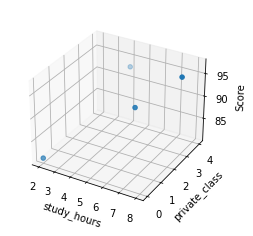

In [61]:
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours') 
ax.set_ylabel('private_class') 
ax.set_zlabel('Score') 
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

## 1차원 예측 직선이 3차원 '예측 평면'으로 바뀌었습니다. 
## 과외 수업 횟수(private class)라는 새로운 변수가 추가되면서 1차원 직선에서만
## 움직이던 예측 결과가 더 넓은 평면 범위 안에서 움직이게 되었고,
## 따라서 이로 인해 더욱 정밀한 예측을 할 수 있게 된 것이다.